# Homework 2, MSBC.5190 Modern Artificial Intelligence S23


**Teammates: Kersti Kammerer, Alyssa Duke, Wes Weber**

**Teamname: Team1**

Handout 03/10/2022 4pm, **due 03/24/2022 by 4pm**. Please submit through Canvas. Each team only needs to submit one copy.

Important information about submission:
- Write all code, text (answers), and figures in the notebook.
- Please make sure that the submitted notebook has been run and the cell outputs are visible.
- Please print the notebook as PDF and submit it together with the notebook. Your submission should contain two files: `homework2-teamname.ipynb` and `homework2-teamname.pdf`

The goal of the homework are three folds:


1.   Explore word embedding 
2.   Understand contextual word embedding using BERT
3.   Text classificaiton with both traditional machine learning methods and deep learning methods

**A note about GPU**: You'd better use GPU to run it, otherwise it will be quite slow to train deep learning models.  

First, import the packages or modules required for this homework.

In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #
# Import packages or modules                                                   #
################################################################################
import tensorflow as tf
import numpy as np
from tensorflow import keras

## Part I: Explore Word Embedding (15%)

Word embeddings are useful representation of words that capture information about word meaning as well as location. They are used as a fundamental component for downstream NLP tasks, e.g., text classification. In this part, we will explore the embeddings produced by [GloVe (global vectors for word representation)](https://nlp.stanford.edu/projects/glove/). It is simlar to Word2Vec but differs in their underlying methodology: in GloVe, word embeddings are learned based on global word-word co-occurrence statistics. Both Word2Vec and GloVe tend to produce vector-space embeddings that perform similarly in downstream NLP tasks.




We first load the GloVe vectors

In [ ]:
import gensim.downloader as api
# download the model and return as object ready for use
glove_model = api.load('glove-wiki-gigaword-100') 
#load the word vectors from the model     
glove_word_vectors = glove_model.wv                        

<ipython-input-12-4c272531b1ec>:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  glove_word_vectors = glove_model.wv


Take a look at the vocabulary size and dimensionality of the embedding space

In [ ]:
print('vocabulary size = ', len(glove_word_vectors.vocab))
print('embedding dimensionality = ', glove_word_vectors['happy'].shape)

vocabulary size =  400000
embedding dimensionality =  (100,)



What is embedding exactly?

In [ ]:
# Check word embedding for 'happy'
# You can access the embedding of a word with glove_word_vectors[word] if word
# is in the vocabulary
glove_word_vectors['happy']

array([-0.090436 ,  0.19636  ,  0.29474  , -0.47706  , -0.80436  ,
        0.3078   , -0.55205  ,  0.58453  , -0.17056  , -0.84846  ,
        0.19528  ,  0.23671  ,  0.46827  , -0.58977  , -0.12163  ,
       -0.24697  , -0.072944 ,  0.17259  , -0.0485   ,  0.9527   ,
        0.50629  ,  0.58497  , -0.19367  , -0.45459  , -0.031095 ,
        0.51633  , -0.24052  , -0.1007   ,  0.53627  ,  0.024225 ,
       -0.50162  ,  0.73692  ,  0.49468  , -0.34744  ,  0.89337  ,
        0.057439 , -0.19127  ,  0.39333  ,  0.21182  , -0.89837  ,
        0.078704 , -0.16344  ,  0.45261  , -0.41096  , -0.19499  ,
       -0.13489  , -0.016313 , -0.021849 ,  0.17136  , -1.2413   ,
        0.079503 , -0.91144  ,  0.35699  ,  0.36289  , -0.24934  ,
       -2.1196   ,  0.14534  ,  0.52964  ,  0.90134  ,  0.033603 ,
        0.022809 ,  0.70625  , -1.0362   , -0.59809  ,  0.70592  ,
       -0.072793 ,  0.67033  ,  0.52763  , -0.47807  , -0.67374  ,
        0.36632  , -0.38284  , -0.10349  , -0.6402   ,  0.1810

With word embeddings learned from GloVe or Word2Vec, words with similar semantic meanings tend to have vectors that are close together. Please code and calculate the **cosine similarities** between words based on their embeddings (i.e., word vectors).

For each of the following words in occupation, compute its cosine similarty to 'woman' and its similarity to 'man' and check which gender is more similar. 

*occupation = {homemaker, nurse, receptionist, librarian, socialite, hairdresser, nanny, bookkeeper, stylist, housekeeper, maestro, skipper, protege, philosopher, captain, architect, financier, warrior, broadcaster, magician}*

**Inline Question #1:** 
- Fill in the table below with cosine similarities between words in occupation list and {woman, man}. Please show only two digits after decimal.
- Which words are more similar to 'woman' than to 'man'?
- Which words are more similar to 'man' than to 'woman'?
- Do you see any issue here? What do you think might cause these issues?

**Your Answer:**

Words more similar to woman: housemaker, nurse, receptionist, librarian, socialite, hairdresser, nanny, bookkeeper, stylist, housekeeper.
Words more similar to man: maestro, skipper, protege, philosopher, captain, architect, financier, warrior, broadcaster, magician. 

An issue in these cosine similarities is that these embeddings may have been trained on data which may contain biases and stereotypes or might be outdated, which may impact the similarity scores. We can see some of the stereotypes in the scores because jobs such as nurse, homemaker, nanny, etc. are more similar to women while warrior, financier, architect, etc. are more aligned with men. These associations might not accurately reflect the abilities of male or female individuals and can contribute to gender discrimination in various fields.



| `similarity`|    woman  |      man     |
|-------------|-----------|--------------|
| homemaker   |   0.43        |       0.24       |
| nurse       |    0.61       |       0.46     |
| receptionist|     0.34      |        0.19      |
| librarian   |    0.34       |       0.23       |
| socialite   |    0.42       |        0.27      |
| hairdresser |     0.39      |        0.26      |
| nanny       |    0.36       |        0.29      |
| bookkeeper  |     0.21      |       0.14       |
| stylist     |     0.31      |      0.25        |
| housekeeper |     0.46      |        0.31      |
| maestro     |   -0.02        |       0.14       |
| skipper     |    0.15       |      0.34        |
| protege     |     0.12      |       0.2       |
| philosopher |   0.23        |      0.28        |
| captain     |   0.31        |       0.53       |
| architect   |    0.22       |       0.3       |
| financier   |     0.14      |        0.26      |
| warrior     |    0.39       |      0.51        |
| broadcaster |     0.23      |        0.25      |
| magician    |    0.27       |      0.38        |


In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #                                                          #
################################################################################
occupation = ["homemaker", "nurse", "receptionist", "librarian", "socialite", "hairdresser", 
              "nanny", "bookkeeper", "stylist", "housekeeper", "maestro", "skipper", "protege", 
              "philosopher", "captain", "architect", "financier", "warrior", "broadcaster", "magician"]
male_sim = []
for i in occupation:
  male_sim.append(glove_model.similarity(w1=i, w2='man'))
  male_sim2 = [round(i, 2) for i in male_sim]

print(f"man similarity = {male_sim2}")

female_sim = []
for i in occupation:
  female_sim.append(glove_model.similarity(w1=i, w2='woman'))
  female_sim2 = [round(i, 2) for i in female_sim]

print(f"woman similarity = {female_sim2}")


man similarity = [0.24, 0.46, 0.19, 0.23, 0.27, 0.26, 0.29, 0.14, 0.25, 0.31, 0.14, 0.34, 0.2, 0.28, 0.53, 0.3, 0.26, 0.51, 0.25, 0.38]
woman similarity = [0.43, 0.61, 0.34, 0.34, 0.42, 0.39, 0.36, 0.21, 0.31, 0.46, -0.02, 0.15, 0.12, 0.23, 0.31, 0.22, 0.14, 0.39, 0.23, 0.27]


## Part II Understand contextual word embedding using BERT (15%)

A big difference between Word2Vec and BERT is that Word2Vec learns context-free word representations, i.e., the embedding for 'orange' is the same in "I love eating oranges" and in "The sky turned orange". BERT, on the other hand, produces contextual word presentations, i.e., embeddings for the same word in different contexts should be different. 

For example, let us compare the context-based embedding vectors for 'orange' in the following three sentences using Bert:
* "I love eating oranges"
* "My favorite fruits are oranges and apples"
* "The sky turned orange"

Same as in "Lab 4 Natural Language Processing", we use the BERT model and tokenizer from the Huggingface transformer library ([1](https://huggingface.co/course/chapter1/1), [2](https://huggingface.co/docs/transformers/quicktour)) 

In [ ]:
!pip install -q transformers

In [ ]:
from transformers import BertTokenizer, TFBertModel

We use the 'bert-base-cased' from Huggingface as the underlying BERT model and the associated tokenizer.

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
example_sentences = ["I love eating oranges",
                     "My favorite fruits are oranges and apples",
                     "The sky turned orange"]

Let us start by tokenizing the example sentences. 

In [ ]:
# Check how Bert tokenize each sentence
# This helps us identify the location of 'orange' in the tokenized vector
for sen in example_sentences:
  print(bert_tokenizer.tokenize(sen))

['I', 'love', 'eating', 'orange', '##s']
['My', 'favorite', 'fruits', 'are', 'orange', '##s', 'and', 'apples']
['The', 'sky', 'turned', 'orange']


Notice that the prefix '##' indicates that the token is a continuation of the previous one. This also helps us identify location of 'orange' in the tokenized vector, e.g., 'orange' is the 4th token in the first sentence. Note that here the tokenize() function just splits a text into words, and doesn't add a 'CLS' (classification token) or a 'SEP' (separation token) to the text.

Next, we use the tokenizer to transfer the example sentences to input that the Bert model expects. 

In [ ]:
bert_inputs = bert_tokenizer(example_sentences,
                             padding=True,
                             return_tensors='tf')

bert_inputs

{'input_ids': <tf.Tensor: shape=(3, 10), dtype=int32, numpy=
array([[  101,   146,  1567,  5497,  5925,  1116,   102,     0,     0,
            0],
       [  101,  1422,  5095, 11669,  1132,  5925,  1116,  1105, 22888,
          102],
       [  101,  1109,  3901,  1454,  5925,   102,     0,     0,     0,
            0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(3, 10), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3, 10), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]], dtype=int32)>}

So there are actually three outputs: the input ids (starting with '101' for the '[CLS]' token), the token_type_ids which are usefull when one has distinct segments, and the attention masks which are used to mask out padding tokens. 

Please refer to our Lab 4 for more details about input_ids, token_type_ids, and attention_masks. 

More resources:
*    https://huggingface.co/docs/transformers/preprocessing
*    https://huggingface.co/docs/transformers/tokenizer_summary

Now, let us get the BERT encoding of our example sentences.

In [ ]:
bert_outputs = bert_model(bert_inputs)

print('shape of first output: \t\t', bert_outputs[0].shape)
print('shape of second output: \t', bert_outputs[1].shape)

shape of first output: 		 (3, 10, 768)
shape of second output: 	 (3, 768)


There are two outputs here: one with dimensions [3, 10, 768] and one with [3, 768]. The first one [batch_size, sequence_length, embedding_size] is the output of the last layer of the Bert model and are the contextual embeddings of the words in the input sequence. The second output [batch_size, embedding_size] is the embedding of the first token of the sequence (i.e., classification token).

Note you can also get the first output through bert_output.last_hidden_state (see below, also check https://huggingface.co/docs/transformers/v4.16.2/en/model_doc/bert#transformers.TFBertModel)

We need the first output to get contextualized embeddings for 'orange' in each sentence.

In [ ]:
bert_outputs[0]

<tf.Tensor: shape=(3, 10, 768), dtype=float32, numpy=
array([[[ 0.72526085,  0.10203107, -0.2456913 , ..., -0.04899121,
          0.39186493,  0.02921055],
        [ 0.22793163,  0.12613113,  0.12215047, ...,  0.310737  ,
         -0.13684075,  0.3392896 ],
        [ 0.11651912,  0.20991719, -0.62462854, ...,  0.7515278 ,
         -0.7327963 ,  0.05906107],
        ...,
        [-0.10604842, -0.19108056, -0.11248206, ...,  0.13676174,
          0.0700283 ,  0.19438447],
        [ 0.05706025, -0.29356375, -0.03861137, ...,  0.01286015,
          0.27537045,  0.15846874],
        [ 0.24304411, -0.06842139,  0.09176363, ..., -0.1619789 ,
          0.24152735,  0.00447925]],

       [[ 0.5403354 , -0.11092855, -0.12229552, ..., -0.16148913,
          0.238005  , -0.0380555 ],
        [-0.08707756, -0.13345723,  0.35856643, ..., -0.06155151,
          0.13525108,  0.3893334 ],
        [-0.01516266, -0.41845638, -0.1303033 , ...,  0.12552258,
         -0.49384457,  0.52132285],
        ...,


In [ ]:
bert_outputs.last_hidden_state

<tf.Tensor: shape=(3, 10, 768), dtype=float32, numpy=
array([[[ 0.72526085,  0.10203107, -0.2456913 , ..., -0.04899121,
          0.39186493,  0.02921055],
        [ 0.22793163,  0.12613113,  0.12215047, ...,  0.310737  ,
         -0.13684075,  0.3392896 ],
        [ 0.11651912,  0.20991719, -0.62462854, ...,  0.7515278 ,
         -0.7327963 ,  0.05906107],
        ...,
        [-0.10604842, -0.19108056, -0.11248206, ...,  0.13676174,
          0.0700283 ,  0.19438447],
        [ 0.05706025, -0.29356375, -0.03861137, ...,  0.01286015,
          0.27537045,  0.15846874],
        [ 0.24304411, -0.06842139,  0.09176363, ..., -0.1619789 ,
          0.24152735,  0.00447925]],

       [[ 0.5403354 , -0.11092855, -0.12229552, ..., -0.16148913,
          0.238005  , -0.0380555 ],
        [-0.08707756, -0.13345723,  0.35856643, ..., -0.06155151,
          0.13525108,  0.3893334 ],
        [-0.01516266, -0.41845638, -0.1303033 , ...,  0.12552258,
         -0.49384457,  0.52132285],
        ...,


Now, we get the embeddings of 'orange' in each sentence by simply finding the 'orange'-token positions in the embedding output and extract the proper components:

In [ ]:
orange_1 = bert_outputs[0][0, 4] 
orange_2 = bert_outputs[0][1, 5]
orange_3 = bert_outputs[0][2, 4]

oranges = [orange_1, orange_2, orange_3]

We calculate pair-wise cosine similarities:

In [ ]:
def cosine_similarities(vecs):
    for v_1 in vecs:
        similarities = ''
        for v_2 in vecs:
            similarities += ('\t' + str(np.dot(v_1, v_2)/
                np.sqrt(np.dot(v_1, v_1) * np.dot(v_2, v_2)))[:4])
        print(similarities)

In [ ]:
cosine_similarities(oranges)

	1.0	0.91	0.69
	0.91	1.0	0.66
	0.69	0.66	1.0


The similarity metrics make sense. The 'orange' in "The sky turned orange" is different from the rest. 

Next, please compare the contextual embedding vectors of 'bank' in the following four sentences:


*   "I need to bring my money to the bank today"
*   "I will need to bring my money to the bank tomorrow"
*   "I had to bank into a turn"
*   "The bank teller was very nice"


**Inline Question #1:** 

- Please calculate the pair-wise cosine similarities between 'bank' in the four sentences and fill in the table below. (Note, bank_i represent bank in the i_th sentence)
- Please explain the results. Does it make sense?

**Your Answer:**
Yes, the results makes sense. We would expect the highest similarities between bank_1 and bank_2 because the context is almost identical. This is shown by the pair-wise similarity of 0.99. We also expect the lowest similarity between bank_3 and the rest of the "banks" because it is a verb and the context is the most unrelated in this instance. Sentence 3 has a similarity of just 0.59 with sentences 1 and 2, and 0.62 with sentence four. Finally, "bank" in the fourth sentence is highly similar to the first and second bank contexts, with a similarity of 0.87. However, this number is not quite as high as the 0.99 similarity seen between the bank_1 and bank_2 because bank_4 is describing a person who works at a bank, rather than the bank itself.  

| `similarity`|  bank_1  |  bank_2  |  bank_3  |  bank_4  |
|-------------|----------|----------|----------|----------|
| bank_1      |    1.0  |   0.99     |  0.59      |    0.86      |
| bank_2      |   0.99       |   1.0       |   0.59   | 0.87      |
| bank_3      |   0.59    |     0.59  |   1.0    |    0.62      |
| bank_4      |   0.86    |   0.87     |    0.62   |    1.0      |

In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #                                                              #
################################################################################
example_sentences = ["I need to bring my money to the bank today",
                     "I will need to bring my money to the bank tomorrow",
                     "I had to bank into a turn",
                     "The bank teller was very nice"]
for sen in example_sentences:
  print(bert_tokenizer.tokenize(sen))


['I', 'need', 'to', 'bring', 'my', 'money', 'to', 'the', 'bank', 'today']
['I', 'will', 'need', 'to', 'bring', 'my', 'money', 'to', 'the', 'bank', 'tomorrow']
['I', 'had', 'to', 'bank', 'into', 'a', 'turn']
['The', 'bank', 'tell', '##er', 'was', 'very', 'nice']


In [ ]:
bert_inputs = bert_tokenizer(example_sentences,
                             padding=True,
                             return_tensors='tf')

bert_inputs

{'input_ids': <tf.Tensor: shape=(4, 13), dtype=int32, numpy=
array([[ 101,  146, 1444, 1106, 2498, 1139, 1948, 1106, 1103, 3085, 2052,
         102,    0],
       [ 101,  146, 1209, 1444, 1106, 2498, 1139, 1948, 1106, 1103, 3085,
        4911,  102],
       [ 101,  146, 1125, 1106, 3085, 1154,  170, 1885,  102,    0,    0,
           0,    0],
       [ 101, 1109, 3085, 1587, 1200, 1108, 1304, 3505,  102,    0,    0,
           0,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(4, 13), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(4, 13), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]], dtype=int32)

In [ ]:
bert_outputs = bert_model(bert_inputs)
bank_1 = bert_outputs[0][0, 9]
bank_2 = bert_outputs[0][1, 10]
bank_3 = bert_outputs[0][2, 4]
bank_4 = bert_outputs[0][3, 2]
banks = [bank_1, bank_2, bank_3, bank_4]
cosine_similarities(banks)

	1.0	0.99	0.59	0.86
	0.99	1.0	0.59	0.87
	0.59	0.59	1.0	0.62
	0.86	0.87	0.62	1.0


## Part III Text classification

In this part, you will build text classifiers that try to infer whether tweets from [@realDonaldTrump](https://twitter.com/realDonaldTrump) were written by Trump himself or by a staff person.
This is an example of binary classification on a text dataset. 

It is known that Donald Trump uses an Android phone, and it has been observed that some of his tweets come from Android while others come from other devices (most commonly iPhone). It is widely believed that Android tweets are written by Trump himself, while iPhone tweets are written by other staff. For more information, you can read this [blog post by David Robinson](http://varianceexplained.org/r/trump-tweets/), written prior to the 2016 election, which finds a number of differences in the style and timing of tweets published under these two devices. (Some tweets are written from other devices, but for simplicity the dataset for this assignment is restricted to these two.)

This is a classification task known as "authorship attribution", which is the task of inferring the author of a document when the authorship is unknown. We will see how accurately this can be done with linear classifiers using word features.

You might find it familiar: Yes! We are using the same data set as your homework 2 from MSBC 5180.

### Tasks

In this section, you will build two text classifiers: one with a traditional machine learning method that you studied in MSBC.5190 and one with a deep learning method.


*   For the first classifier, you can use any non-deep learning based methods. You can use your solution to Homework 2 of MSBC 5180 here.
*   For the second classifier, you may try the following methods
    *    Fine-tune BERT (similar to our lab 4 Fine-tune BERT for Sentiment Analysis)
    *    Use pre-trained word embedding (useful to check: https://keras.io/examples/nlp/pretrained_word_embeddings/)
    *    Train a deep neural network (e.g., RNN, Bi-LSTM) from scratch (similar to notebooks from our textbook: https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/bi_lstm_sentiment_classifier.ipynb)

You may want to split the current training data to train and validation to help model selection.



### Load the Data Set

#### Sample code to load raw text###

Please download `tweets.train.tsv` and `tweets.test.tsv` from Canvas (Module Assignment) and upload them to Google Colab. Here we load raw text data to text_train and text_test. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#training set
df_train = pd.read_csv('tweets.train.tsv', sep='\t', header=None)

text_train = df_train.iloc[0:, 1].values.tolist()
Y_train = df_train.iloc[0:, 0].values
# convert to binary labels (0 and 1)
y_train = np.array([1 if v == 'Android' else 0 for v in Y_train])

df_test = pd.read_csv('tweets.test.tsv', sep='\t', header=None)
text_test = df_test.iloc[0:, 1].values.tolist()
Y_test = df_test.iloc[0:, 0].values
# convert to binary labels (0 and 1)
y_test = np.array([1 if v == 'Android' else 0 for v in Y_test])

Let us take a quick look of some training examples

In [ ]:
text_train[:5]

["My statement as to what's happening in Sweden was in reference to a story that was broadcast on _USERNAME_ concerning immigrants & Sweden.",
 'Will be having many meetings this weekend at The Southern White House. Big 5:00 P.M. speech in Melbourne, Florida. A lot to talk about!',
 "Don't believe the main stream (fake news) media.The White House is running VERY WELL. I inherited a MESS and am in the process of fixing it.",
 'Looking forward to the Florida rally tomorrow. Big crowd expected!',
 "'One of the most effective press conferences I've ever seen!' says Rush Limbaugh. Many agree.Yet FAKE MEDIA calls it differently! Dishonest"]

In [ ]:
y_train[:5]

array([1, 1, 1, 1, 1])

#### Sample code to preprocess data for BERT ####

The pre-processing step is similar to Lab 4. 

Feel free to dispose it if you want to preprocess the data differently and use methods other than BERT.

In [ ]:
# The longest text in the data is 75 and we use it as the max_length
max_length = 75
x_train = bert_tokenizer(text_train,
              max_length=75,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_train = np.array([1 if v == 'Android' else 0 for v in Y_train])

x_test = bert_tokenizer(text_test,
              max_length=75,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_test = np.array([1 if v == 'Android' else 0 for v in Y_test])

### Your Solution 1: A traditional machine learning approach (30%)

Please implement your text classifier using a traditional machine learning method. 

**Inline Question #1:** 
- What machine leaning model did you use?
- What are the features used in this model?
- What is the model's performance in the test data?

**Your Answer:**
We used a logistic regression model with tf idf. We first transformed the data using a tf idf vectorizer, so the features used in this model include text features extracted using the vectorizer. The features are character-level n-grams (unigrams and bigrams) up to a maximum of 5000 features, after removing stop words in english. The TfidfVectorizer computes the TF-IDF representation of the text, which assigns weights to each feature (n-gram) based on its frequency in the document and across the corpus. The model's performance in the test data is 90.27%.  

In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #
################################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english', use_idf=True)

X_train = vectorizer.fit_transform(text_train)
X_test = vectorizer.transform(text_test)
y_train = np.array([1 if v == 'Android' else 0 for v in Y_train])
y_test = np.array([1 if v == 'Android' else 0 for v in Y_test])

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

Test accuracy: 0.9027027027027027


### Your Solution 2: A deep learning apporach (30%)

Please implement your text classifier using a deep learning method

**Inline Question #1:** 
- What deep leaning model did you use?
- Please briefly explain the input, output, and layers (e.g., what does each layer do) of your model. 
- What is the model's performance in the test data?
- Is it better or worse than Solution 1? What might be the cause?

**Your Answer:**
We chose the bert-base-cased deep learning model. We monitored validation loss and used early stopping to achieve the best accuracy/loss in our validation data. We experimented with smaller/larger learning rates, different batch sizes, and tried using the bert-large-cased model. However, we achieved the highest accuracy with the bert-base-cased model with 7 epochs, a learning rate of 1e-5, and a batch size of 16.  

Input: The input of this model is a sequence of word tokens represented by input ids (a sequence of numerical indices representing the words), token type ids (a sequence of numerical indicies indicating which setntence a tooken belongs to), and attention mask (which is a binary variable indicating which tokens are padding tokens vs actual tokens). 

Output: The output is a probability distribution over two classes in the binary sequence classification task, indicating whether a tweet was written by Trump or an Android. 

Layers:
This model has 12 transformer layers and a classification layer on top of the transformer that maps the final output representation of the [CLS] token to the probability distribution over the two classes. 

The model's performance in the test data is 92.97%, which is an improvement from the traditional logistic regression machine learning method we used. This might be because BERT can handle longer sequences, it can capture contextual information better, and it has been trained on vast amounts of data, which can be easily be altered for the task at hand. The BERT model was pretrained on BookCorpus, a dataset consisting of 11,038 unpublished books and English Wikipedia. Logistic regression on the other hand, was trained from scratch for the specific task. 

https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-bert/#:~:text=Model%20Overview&text=The%20BERTBase%20model%20uses,has%20around%20110M%20trainable%20parameters. 

https://huggingface.co/bert-base-cased 

In [ ]:
from transformers import TFAutoModelForSequenceClassification 
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", 
                                                             num_labels=2)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.model_selection import train_test_split
max_length = 75
text_train, text_valid, Y_train, Y_valid = train_test_split(text_train, Y_train, test_size=0.1, random_state=42)

x_train = bert_tokenizer(text_train,
              max_length=75,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_train = np.array([1 if v == 'Android' else 0 for v in Y_train])

x_valid = bert_tokenizer(text_valid,
              max_length=75,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_valid = np.array([1 if v == 'Android' else 0 for v in Y_valid])


x_test = bert_tokenizer(text_test,
              max_length=75,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_test = np.array([1 if v == 'Android' else 0 for v in Y_test])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4) 
history = model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
          y_train,
          validation_data=([x_valid.input_ids, x_valid.token_type_ids, x_valid.attention_mask], 
                           y_valid),
          epochs=10, 
          batch_size=16,
          callbacks=[early_stopping])

Epoch 1/10
146/146 [==============================] - 121s 336ms/step - loss: 0.3728 - sparse_categorical_accuracy: 0.8388 - val_loss: 0.2632 - val_sparse_categorical_accuracy: 0.8923
Epoch 2/10
146/146 [==============================] - 39s 269ms/step - loss: 0.2164 - sparse_categorical_accuracy: 0.9173 - val_loss: 0.2380 - val_sparse_categorical_accuracy: 0.9115
Epoch 3/10
146/146 [==============================] - 41s 280ms/step - loss: 0.1410 - sparse_categorical_accuracy: 0.9464 - val_loss: 0.2152 - val_sparse_categorical_accuracy: 0.9308
Epoch 4/10
146/146 [==============================] - 41s 278ms/step - loss: 0.0780 - sparse_categorical_accuracy: 0.9730 - val_loss: 0.2471 - val_sparse_categorical_accuracy: 0.9115
Epoch 5/10
146/146 [==============================] - 40s 277ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.3172 - val_sparse_categorical_accuracy: 0.8962
Epoch 6/10
146/146 [==============================] - 41s 278ms/step - loss: 0.0147 

In [ ]:
import matplotlib.pyplot as plt
def plot_learning_curve(history):
  plt.plot(history.history['sparse_categorical_accuracy'])
  plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

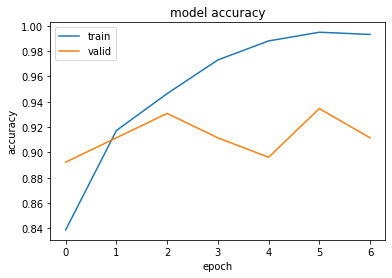

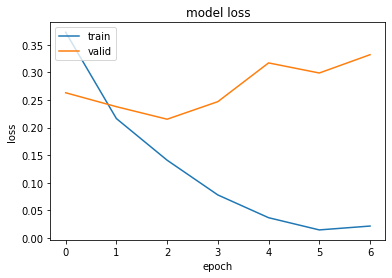

In [ ]:
plot_learning_curve(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(
    [x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], 
    y_test,
    batch_size=16)
print(f"Test Loss:{test_loss}")
print(f"Test Accuracy:{test_accuracy}")

12/12 [==============================] - 1s 109ms/step - loss: 0.2301 - sparse_categorical_accuracy: 0.9297
Test Loss:0.23006680607795715
Test Accuracy:0.929729700088501


## Final note (10%)

Similar to Homework 1, 10% of the total grade is allocated based on model performance. Teams with higher performance scores (max of solution 1 and solution 2) get higher grade. 

